In [1]:
import cPickle as pickle
import gzip
import matplotlib.pylab as pl
%matplotlib inline
import numpy as np
from scipy.misc import imresize as rescale
from data_utilities import load_mnist

In [2]:
training_X, training_Y, validation_X, validation_Y, test_X, test_Y = load_mnist(shape=(28, 28))

In [3]:
from random import choice
def paint(image):
    canvas = np.random.uniform(0, 1, (28, 28))
    canvas = np.minimum(canvas + image, 1)
    return canvas

In [4]:
def generate_dataset(X):
    generated = []
    for point in X: generated.append(paint(point))
    array = np.reshape(np.array(generated), (len(X), 28 * 28)).astype(np.float16)
    return array

In [5]:
noisy_mnist = (
    (generate_dataset(training_X), training_Y),
    (generate_dataset(validation_X), validation_Y),
    (generate_dataset(test_X), test_Y),
)

In [7]:
pickle.dump(noisy_mnist, open('noisy_mnist/mnist', 'wb'))

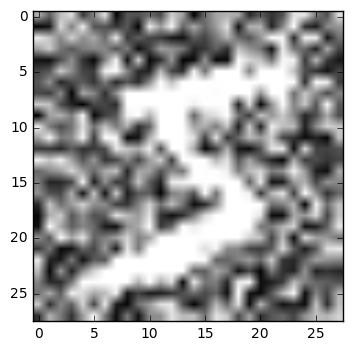

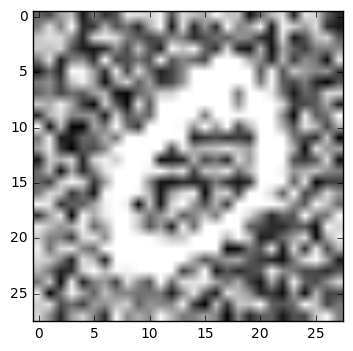

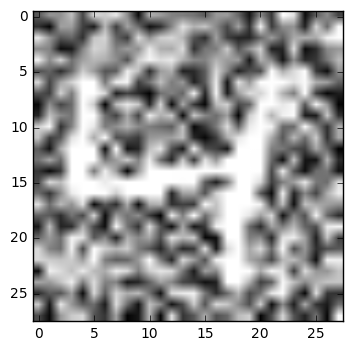

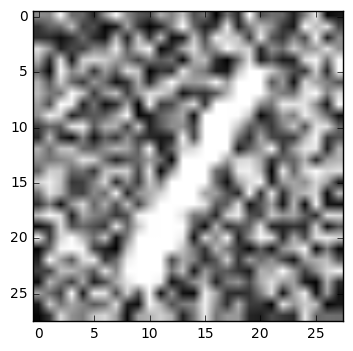

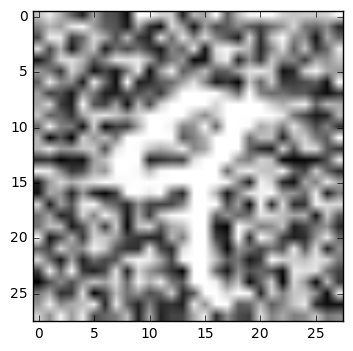

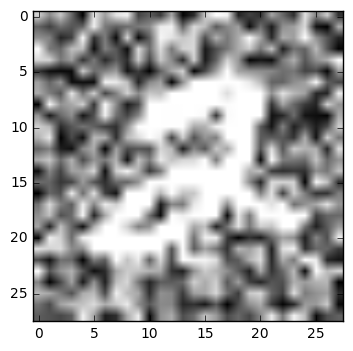

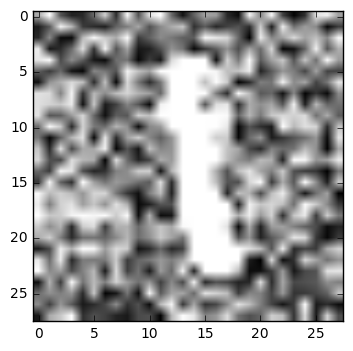

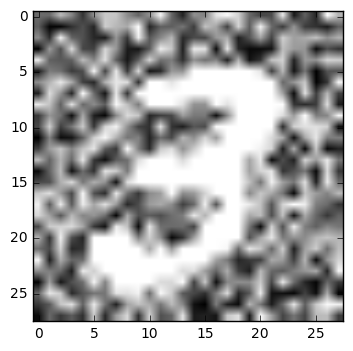

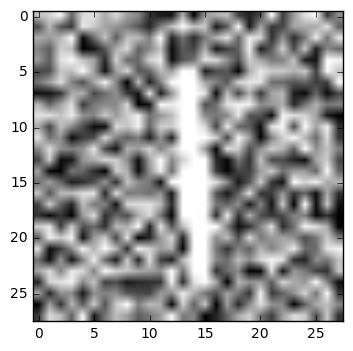

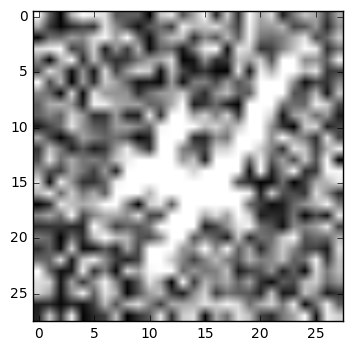

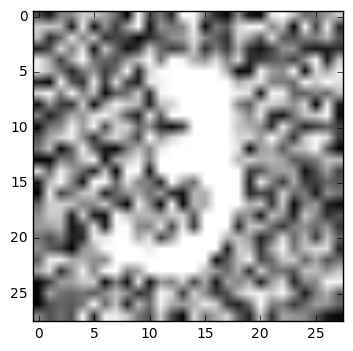

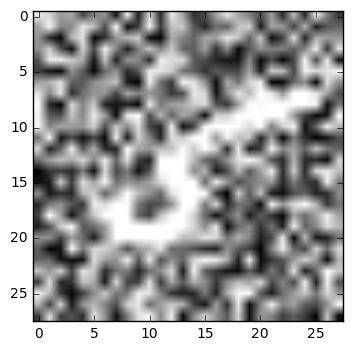

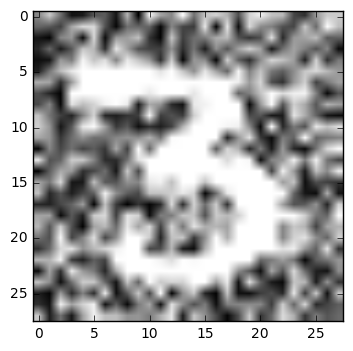

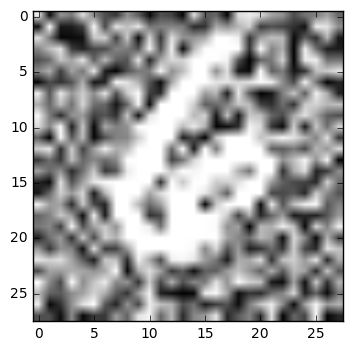

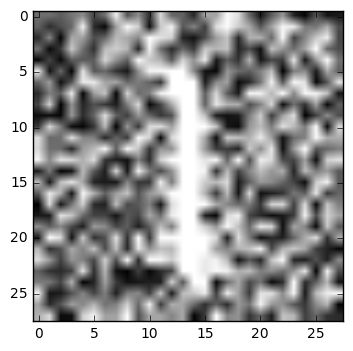

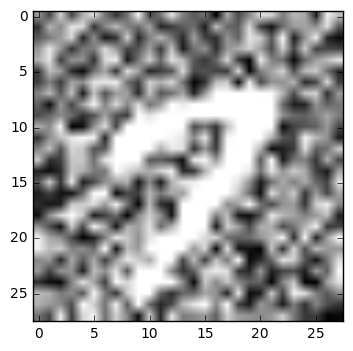

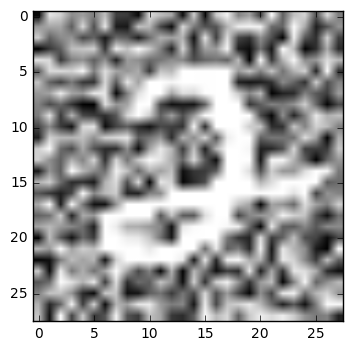

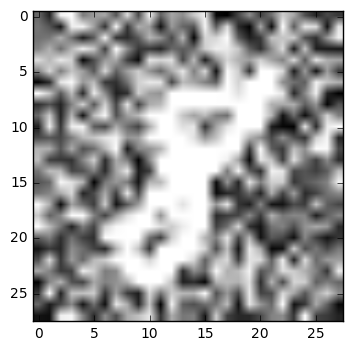

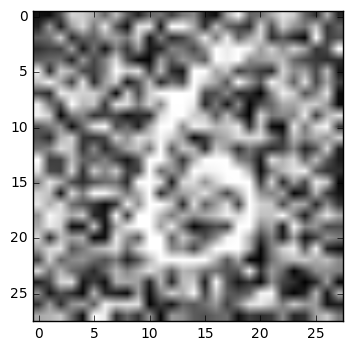

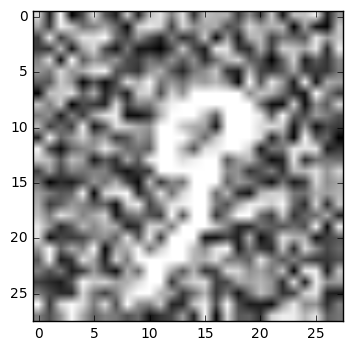

In [8]:
for image in noisy_mnist[0][0][:20]:
    pl.figure()
    pl.imshow(image.reshape((28, 28)), cmap='gray')